In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Read CSV
df = pd.read_csv("articles.csv")
df.head()

# output = nltk.pos_tag(text)
# print(output)

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Politics,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Politics,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Politics,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Politics,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Politics,1


In [3]:
stop = stopwords.words('english') 

In [4]:
# lowercase title
###title_token = word_tokenize(data['title'])
df['title'] = df['title'].apply(lambda x: x.lower())

#data['title'] = data['title'].apply(lambda x: ''.join (word for word in x.split() if word not in (stop)))

In [5]:
df['title_tokenized'] = df['title'].apply(word_tokenize)
df['title_tokenized'].head()

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: title_tokenized, dtype: object

In [6]:
df['title_stopremoved'] = df['title_tokenized'].apply(lambda x: [item for item in x if item not in stop])
df['title_stopremoved'].head()

0    [donald, trump, sends, embarrassing, new, year...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, internet, jo...
3    [trump, obsessed, even, obama, ’, name, coded,...
4    [pope, francis, called, donald, trump, christm...
Name: title_stopremoved, dtype: object

In [7]:
# from nltk.tag import pos_tag
# #df['title_POS'] = nltk.pos_tag(df['title_stopremoved'])
# df['title_POS'] = pos_tag(word_tokenize(df['title']))

In [24]:
title_wordcount = df['title_stopremoved'].apply(len)
df['title_wordcount'] = title_wordcount

In [9]:
#df

<AxesSubplot:>

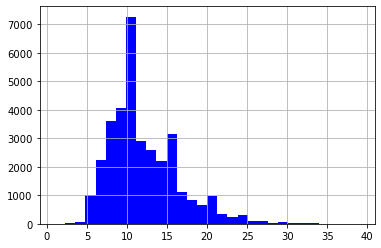

In [10]:
pd.Series(title_wordcount).hist(bins = 30,color='blue')

<AxesSubplot:>

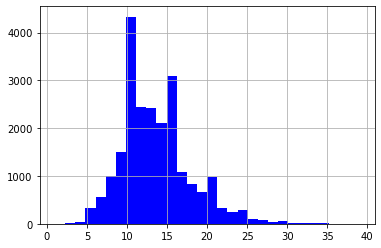

In [11]:
# Fake news titles

df2 = df.loc[df['label']==1]
fake_title_wordcount = df2['title_stopremoved'].apply(len)
pd.Series(fake_title_wordcount).hist(bins = 30,color='blue')

<AxesSubplot:>

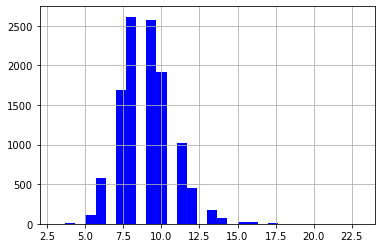

In [12]:
# True news titles

df3 = df.loc[df['label']==0]
true_title_wordcount = df3['title_stopremoved'].apply(len)
pd.Series(true_title_wordcount).hist(bins = 30,color='blue')

In [13]:
#title_tag = df['title_stopremoved'].to_numpy()
# from sklearn.feature_extraction.text import TfidfVectorizer 
 
# # settings that you use for count vectorizer will go here 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# # just send in all your docs here 
# tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(title_tag)
# nltk.pos_tag(title_tag)

In [14]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# cv=CountVectorizer(max_features=1000)
# vect=cv.fit_transform(df['title_stopremoved'].toarray()
# vect

In [15]:
# Totenizing text
###title_token = word_tokenize(data['title'])
df['text_tokenized'] = df['text'].apply(word_tokenize)
df['text_tokenized'].head()

0    [Donald, Trump, just, couldn, t, wish, all, Am...
1    [House, Intelligence, Committee, Chairman, Dev...
2    [On, Friday, ,, it, was, revealed, that, forme...
3    [On, Christmas, day, ,, Donald, Trump, announc...
4    [Pope, Francis, used, his, annual, Christmas, ...
Name: text_tokenized, dtype: object

In [16]:
df['text_stopremoved'] = df['text_tokenized'].apply(lambda x: [item for item in x if item not in stop])
df['text_stopremoved'].head()

0    [Donald, Trump, wish, Americans, Happy, New, Y...
1    [House, Intelligence, Committee, Chairman, Dev...
2    [On, Friday, ,, revealed, former, Milwaukee, S...
3    [On, Christmas, day, ,, Donald, Trump, announc...
4    [Pope, Francis, used, annual, Christmas, Day, ...
Name: text_stopremoved, dtype: object

In [25]:
text_wordcount= df['text_stopremoved'].apply(len)
df['text_wordcount']=text_wordcount
df

,title,text,subject,label,title_tokenized,title_stopremoved,text_tokenized,text_stopremoved,text_wordcount,title_wordcount
0,donald trump sends out embarrassing new year’...,Donald Trump just couldn t wish all Americans ...,Politics,1,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, embarrassing, new, year...","[Donald, Trump, just, couldn, t, wish, all, Am...","[Donald, Trump, wish, Americans, Happy, New, Y...",406,11
1,drunk bragging trump staffer started russian ...,House Intelligence Committee Chairman Devin Nu...,Politics,1,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus...","[House, Intelligence, Committee, Chairman, Dev...","[House, Intelligence, Committee, Chairman, Dev...",211,8
2,sheriff david clarke becomes an internet joke...,"On Friday, it was revealed that former Milwauk...",Politics,1,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, internet, jo...","[On, Friday, ,, it, was, revealed, that, forme...","[On, Friday, ,, revealed, former, Milwaukee, S...",469,12
3,trump is so obsessed he even has obama’s name...,"On Christmas day, Donald Trump announced that ...",Politics,1,"[trump, is, so, obsessed, he, even, has, obama...","[trump, obsessed, even, obama, ’, name, coded,...","[On, Christmas, day, ,, Donald, Trump, announc...","[On, Christmas, day, ,, Donald, Trump, announc...",356,11
4,pope francis just called out donald trump dur...,Pope Francis used his annual Christmas Day mes...,Politics,1,"[pope, francis, just, called, out, donald, tru...","[pope, francis, called, donald, trump, christm...","[Pope, Francis, used, his, annual, Christmas, ...","[Pope, Francis, used, annual, Christmas, Day, ...",261,7
...,...,...,...,...,...,...,...,...,...,...
33970,obama says willing to work with republican spe...,WASHINGTON (Reuters) - President Barack Obama ...,Politics,0,"[obama, says, willing, to, work, with, republi...","[obama, says, willing, work, republican, speak...","[WASHINGTON, (, Reuters, ), -, President, Bara...","[WASHINGTON, (, Reuters, ), -, President, Bara...",58,7
33971,obama says islamic state fight far from 'world...,WASHINGTON (Reuters) - President Barack Obama ...,Politics,0,"[obama, says, islamic, state, fight, far, from...","[obama, says, islamic, state, fight, far, 'wor...","[WASHINGTON, (, Reuters, ), -, President, Bara...","[WASHINGTON, (, Reuters, ), -, President, Bara...",84,12
33972,chelsea clinton stands her mother's ground in ...,"MANCHESTER, N.H. (Reuters) - U.S. Democratic p...",Politics,0,"[chelsea, clinton, stands, her, mother, 's, gr...","[chelsea, clinton, stands, mother, 's, ground,...","[MANCHESTER, ,, N.H., (, Reuters, ), -, U.S., ...","[MANCHESTER, ,, N.H., (, Reuters, ), -, U.S., ...",341,8
33973,obama jokes about a trump state of the union a...,WASHINGTON (Reuters) - President Barack Obama ...,Politics,0,"[obama, jokes, about, a, trump, state, of, the...","[obama, jokes, trump, state, union, address]","[WASHINGTON, (, Reuters, ), -, President, Bara...","[WASHINGTON, (, Reuters, ), -, President, Bara...",281,6


<AxesSubplot:>

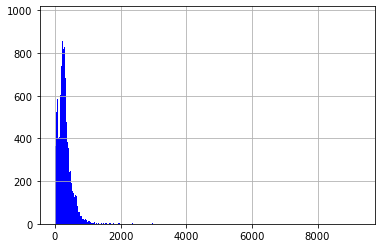

In [18]:
pd.Series(text_wordcount).hist(bins = 1000,color='blue')

<AxesSubplot:>

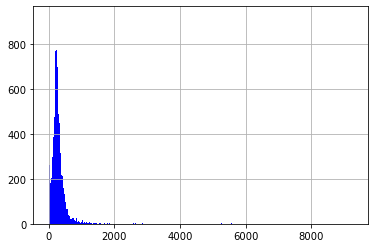

In [19]:
# Fake news text

df4 = df.loc[df['label']==1]
fake_text_wordcount = df4['text_stopremoved'].apply(len)
pd.Series(fake_text_wordcount).hist(bins = 1000,color='blue')

<AxesSubplot:>

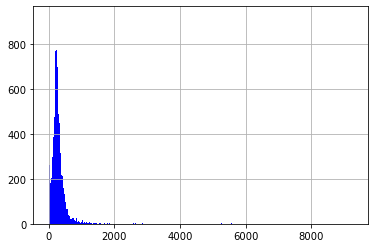

In [20]:
# True news text

df5 = df.loc[df['label']==1]
true_text_wordcount = df5['text_stopremoved'].apply(len)
pd.Series(true_text_wordcount).hist(bins = 1000,color='blue')

In [32]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [39]:
#defining the feature set X
X = df.drop(columns=['title', 'text', 'subject', 'label', 'title_tokenized', 'title_stopremoved', 'text_tokenized', 'text_stopremoved'])
y = df['label']

# Splitting into Train and Test sets into an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [43]:
accuracy = accuracy_score(y_train, y_pred)*100
accuracy
# def accuracy(y_train,y_pred,normalize=True):
#     accuracy=[]
#     for i in range(len(y_pred)):
#         if y_pred[i]==y_train[i]:
#             accuracy.append(1)
#         else:
#             accuracy.append(0)
#     if normalize==True:
#         return np.mean(accuracy)
#     if normalize==False:
#         return sum(accuracy)

78.88888888888889

In [ ]:
# # Splitting into Train and Test sets into an 80/20 split.
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

# # Creating a StandardScaler instance.
# scaler = StandardScaler()
# # Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)

# # Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,
#    y,  random_state=1, stratify=y)
# X_train.shape

# from sklearn.svm import SVC
# model = SVC(kernel='linear')

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# results = pd.DataFrame({
#    "Prediction": y_pred,
#    "Actual": y_test
# }).reset_index(drop=True)
# results.head()

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

# # Confusion Matrix

# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred)

# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))